# Table of Contents

- Importing our Libraries
- Importing our Data
- initial baseline model
- initial data cleaning
- numerical data
    - tests
        - simple and multi-linear regressions
        - scaling
        - logging data
        - polynomials
    - conclusions
- categorical data
    - tests
        - condition
        - nuisance
        - heat
        - grade
    - conclusions
- final results

# Importing our libraries

In [1]:
# Imports
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
# from random import sample
from itertools import combinations
# from statsmodels.stats.power import TTestIndPower, TTestPower
# import math
import seaborn as sns
# import scipy as sp
import pandas as pd
# from matplotlib.lines import Line2D
# import random
import statsmodels.api as sm
# from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
# from statsmodels.stats.stattools import jarque_bera
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_error, mean_squared_error

import num_model_all_combos as simple_test

`num_model_all_codes` is a custom module located in a .py file within this notebook. This module is needed for the notebook to run.

# Importing our Data

In [2]:
# creating initial data frame
df = pd.read_csv('data/kc_house_data.csv')

In [3]:
# checking original df
df.head(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052


In [4]:
df.shape

(30155, 25)

In [5]:
# checking for nulls
df.isna().sum().sum()

46

In [6]:
# dropping nulls
df.dropna(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30111 non-null  int64  
 1   date           30111 non-null  object 
 2   price          30111 non-null  float64
 3   bedrooms       30111 non-null  int64  
 4   bathrooms      30111 non-null  float64
 5   sqft_living    30111 non-null  int64  
 6   sqft_lot       30111 non-null  int64  
 7   floors         30111 non-null  float64
 8   waterfront     30111 non-null  object 
 9   greenbelt      30111 non-null  object 
 10  nuisance       30111 non-null  object 
 11  view           30111 non-null  object 
 12  condition      30111 non-null  object 
 13  grade          30111 non-null  object 
 14  heat_source    30111 non-null  object 
 15  sewer_system   30111 non-null  object 
 16  sqft_above     30111 non-null  int64  
 17  sqft_basement  30111 non-null  int64  
 18  sqft_g

In [8]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.011100e+04,3.011100e+04,30111.000000,30111.000000,30111.000000,3.011100e+04,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000
mean,4.539171e+09,1.108971e+06,3.415197,2.335708,2113.342798,1.664880e+04,1.543506,1810.389658,476.617117,330.475308,217.451264,1975.162299,90.792767,47.328482,-121.318872
std,2.882236e+09,8.965158e+05,0.979755,0.888293,973.453260,5.993303e+04,0.567789,877.726339,579.805355,285.725020,245.301991,32.052930,416.197627,1.433309,5.724073
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.070850e+09,6.492360e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405348,-122.326075
50%,3.876000e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.477000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551440,-122.225790
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2620.000000,1.056800e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669917,-122.116394
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


Our original dataset had 25 features describing 30,155 rows of housing sets. There were 46 rows with null data that were dropped during the cleaning process, leaving us with 30,111 rows of housing set data to use for our model.

Of the 25 features, dtypes included: 10 object, 10 int, and 5 float. We further explain and reduce the features below.

# Initial Baseline Model

To get an initial understanding of our data, we are building a baseline model based on the feature `sqft_living` since it has the highest correlation to our target feature: `price`.

In [9]:
# Checking correlation to price
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.608616
sqft_above       0.538631
bathrooms        0.480337
sqft_patio       0.313789
bedrooms         0.288954
sqft_garage      0.263674
sqft_basement    0.245005
floors           0.180589
yr_built         0.095796
sqft_lot         0.086550
yr_renovated     0.085023
lat              0.063430
long            -0.022278
id              -0.034096
Name: price, dtype: float64

In [10]:
# creating baseline model based on highest .corr() to price (ran above)
X = df[['sqft_living']]
y = df['price']

model = sm.OLS(y, sm.add_constant(X)).fit()
# viewing the baseline model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                 1.771e+04
Date:                Fri, 09 Dec 2022   Prob (F-statistic):               0.00
Time:                        01:14:21   Log-Likelihood:            -4.4847e+05
No. Observations:               30111   AIC:                         8.969e+05
Df Residuals:                   30109   BIC:                         8.970e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.559e+04   9798.815     -7.714      0.000   -9.48e+04   -5.64e+04
sqft_living   560.5134      4.211    133.096      0.000     552.259     568.768
==============================================================================
Omnibus:                    43384.874   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         47187801.072
Skew:                           8.195   Prob(JB):                         0.00
Kurtosis:                     196.242   Cond. No.                     5.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Our first simple-linear regression model has an R-squared value of .37. This model represents only 37% of the variance found in housing prices. Our model is statistically significant with an F-statistic p-value less than our alpha of 0.05. The constant coefficient and predictor variable coefficient are also statistically significant when compared to our alpha.

# Initial Data Cleaning

## Dropping Outliers in our Target

We modeled the target data to check its shape and to determine whether there were outliers that could be affecting our data. After looking at histograms and box plots of `price`, it was decided to remove any values above or below three standard deviations of the mean. This small adjustment allowed us to clean the dataset while only removing .6% of the data. 

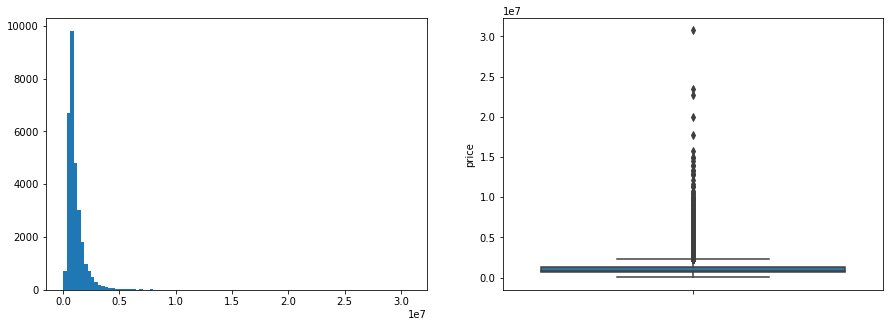

In [11]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))
ax1.hist(df['price'], bins=100)
sns.boxplot(y =df['price']);

In [12]:
# Dropping outliers to within 3 standard deviations
df_no_outliers = df[(df['price'] > np.percentile(df['price'], .3)) & (df['price'] < np.percentile(df['price'], 99.7))]

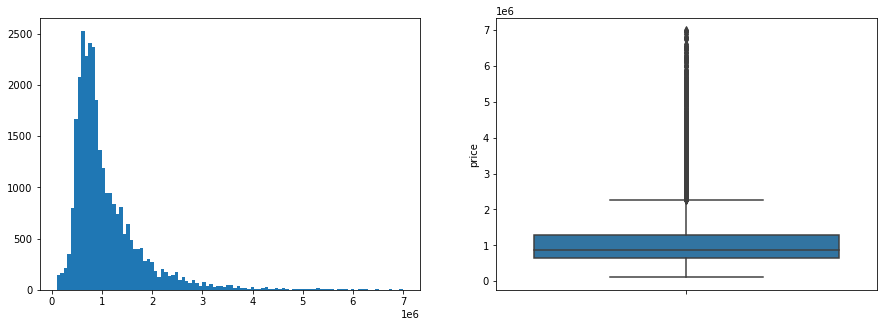

In [13]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))
ax1.hist(df_no_outliers['price'], bins=100)
sns.boxplot(y =df_no_outliers['price']);

In [14]:
df_no_outliers.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,2.992700e+04,2.992700e+04,29927.000000,29927.000000,29927.000000,2.992700e+04,29927.000000,29927.000000,29927.000000,29927.000000,29927.000000,29927.000000,29927.000000,29927.000000,29927.000000
mean,4.541369e+09,1.084893e+06,3.413673,2.330888,2105.252448,1.657447e+04,1.543222,1804.699368,473.342533,329.974338,215.996959,1975.169746,89.750627,47.328459,-121.321354
std,2.882145e+09,7.201688e+05,0.977299,0.877375,950.536144,5.997309e+04,0.567573,863.246578,572.185345,284.019578,242.024168,32.048907,413.920695,1.428233,5.714484
min,1.000055e+06,1.041860e+05,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.077450e+09,6.500000e+05,3.000000,2.000000,1420.000000,4.840000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.404785,-122.326340
50%,3.876002e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.460000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551305,-122.225740
75%,7.297200e+09,1.300000e+06,4.000000,3.000000,2610.000000,1.050700e+04,2.000000,2270.000000,940.000000,510.000000,312.000000,2003.000000,0.000000,47.670115,-122.116020
max,9.904000e+09,6.995000e+06,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,4520.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


## Dropping Features that do not Pertain to the Business Question

These columns are not relevant for a variety of reasons:

- Drop ID: just a unique identifier, no helpful information
- Drop adress and lat/long: Location not important in this analysis
- Drop year renovated and year built: not relevant for remodeling purposes
- Drop date: last sale date is not relevant to remodeling home
- Drop sq ft lot: Cannot change lot size by remodeling home
- Waterfront: remove, we cannot change the house location to be moved next to water
- Greenbelt: remove, we cannot change the house location to be moved next to a greenbelt
- View: remove, we cannot change the house location to have a good view
- Sewer System: not likely to change your entire sewer system during a home remodel

In [15]:
# Dropping columns that have little relationship to renovation
df_dropped = df_no_outliers.drop(['id', 'address', 'lat', 'long', 'yr_built', 
                                  'date', 'sqft_lot', 'waterfront', 'greenbelt',
                                  'view', 'yr_renovated', 'sewer_system'], axis = 1)

In [16]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29927 entries, 0 to 30154
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          29927 non-null  float64
 1   bedrooms       29927 non-null  int64  
 2   bathrooms      29927 non-null  float64
 3   sqft_living    29927 non-null  int64  
 4   floors         29927 non-null  float64
 5   nuisance       29927 non-null  object 
 6   condition      29927 non-null  object 
 7   grade          29927 non-null  object 
 8   heat_source    29927 non-null  object 
 9   sqft_above     29927 non-null  int64  
 10  sqft_basement  29927 non-null  int64  
 11  sqft_garage    29927 non-null  int64  
 12  sqft_patio     29927 non-null  int64  
dtypes: float64(3), int64(6), object(4)
memory usage: 3.2+ MB


## Dropping Outliers in our Predictor Variables

In [17]:
df_dropped_no_outliers = df_dropped.copy()

outlier_check = ['bedrooms', 'sqft_living', 'sqft_above', 'sqft_patio']

for col in outlier_check:
    df_dropped_no_outliers = df_dropped_no_outliers[(df_dropped_no_outliers[col] 
                                                     > np.percentile(df_dropped_no_outliers[col], .3))
                                                    & (df_dropped_no_outliers[col] 
                                                       < np.percentile(df_dropped_no_outliers[col], 99.7))]

# for col in outlier_check:
#     df_dropped_no_outliers = df_dropped_no_outliers[(df_dropped_no_outliers[col] 
#                                                        < np.percentile(df_dropped_no_outliers[col], 99.7))]
    

    
    
outlier_check = ['sqft_garage', 'sqft_basement']

for col in outlier_check:
    df_dropped_no_outliers = df_dropped_no_outliers[(df_dropped_no_outliers[col] 
                                                     > np.percentile(df_dropped_no_outliers[col], .3))
                                                    & (df_dropped_no_outliers[col] 
                                                       < np.percentile(df_dropped_no_outliers[col], 99.7))]

# Numerical Data

## Creating a DataFrame with just continuous numerical data

To run an enhanced simple linear regression model and eventually run multi-lineear regression models, we created a dataframe using only the numerical features in the dataset:
    
    
    - Floors
    - Bathrooms
    - Sqft_living
    - Sqft_above
    - Sqft_basement
    - Sqft_garage
    - Sqft_patio
    
We have removed bedrooms to bring back later as a categorical variable.

In [18]:
# Creating new df with only numerical columns/dropping categorical columns
df_numeric = df_dropped_no_outliers.drop(['bedrooms'], axis = 1).select_dtypes('number')

In [19]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7277 entries, 3 to 30153
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          7277 non-null   float64
 1   bathrooms      7277 non-null   float64
 2   sqft_living    7277 non-null   int64  
 3   floors         7277 non-null   float64
 4   sqft_above     7277 non-null   int64  
 5   sqft_basement  7277 non-null   int64  
 6   sqft_garage    7277 non-null   int64  
 7   sqft_patio     7277 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 511.7 KB


In [20]:
df_numeric.head(3)

,price,bathrooms,sqft_living,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio
3,775000.0,3.0,2160,2.0,1090,1070,200,270
4,592500.0,2.0,1120,2.0,1120,550,550,30
11,680000.0,3.0,2130,1.0,1130,1100,440,280


## Second Simple Linear Regression Model  (After Dropping Outliers in Sale Price)

We needed to run a second simple linear regression model after dropping our outliers to ensure that the model improved after making the changes. To compare the linear models against our results against the simple correlation table run above, we use the function, `simple_num_model_all_combos`, found in the included .py file. This function runs a simple linear regression model on all predictor features in a dataframe against the specified target feature.

Now that the outliers in price have been dropped, our simple linear regression model has an R-squared value of .43, increased from the baseline results of .37.

In [21]:
simple_df = simple_test.simple_num_model_all_combos(df_numeric, 'price')

In [22]:
simple_df

,column,r2,r2_adj,f_stat_p_val,const_coefs,const_p_val,predictor_coef,predictor_p_val
1,sqft_living,0.421117,0.421037,0,-54020.5,0.00397499,534.791,0
3,sqft_above,0.394916,0.394833,0,83290,3.16681e-06,666.167,0
0,bathrooms,0.220791,0.220684,0,41411.9,0.126662,436985,0
6,sqft_patio,0.119937,0.119816,3.98166e-204,884121,0,1127.11,3.98166e-204
4,sqft_basement,0.100789,0.100666,4.36482e-170,598454,6.05052e-139,590.562,4.36482e-170
5,sqft_garage,0.0716212,0.0714936,1.3905e-119,705699,2.71733e-189,1112.48,1.3905e-119
2,floors,0.0465202,0.0463891,2.40729e-77,805560,7.64239e-236,286172,2.40729e-77


In [23]:
simple_df['r2_adj'].sum()

1.374918849438053

## Checking for Multicollinearity

Before we run a multi-linear regression model, we need to ensure that we reduce the multicollinearity within our dataset. To do this, we ran a heat map of the correlation between all features. Two features had correlations above our threshold of .75: `sqft_living`/`bathrooms` and `sqft_living`/`sqft_above`. Since `sqft_living` has the highest correlation with our target variable, we have dropped `bathrooms` and `sqft_above` from future modeling attempts.

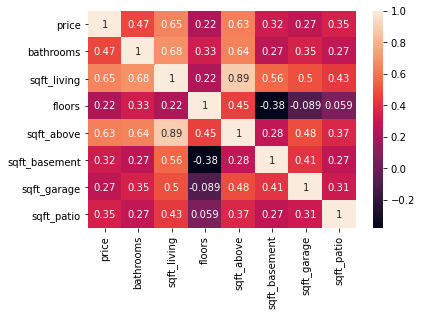

In [24]:
sns.heatmap(df_numeric.corr(), annot=True);

In [25]:
df_numeric_clean = df_numeric.drop(['sqft_above'], axis =1).copy()

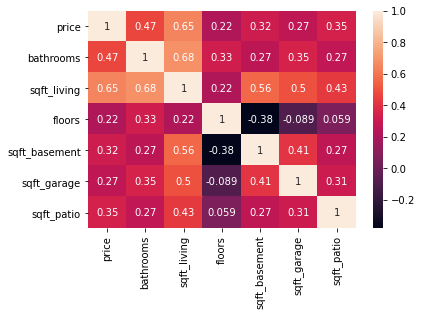

In [26]:
sns.heatmap(df_numeric_clean.corr(), annot=True);

## Baseline Multi-Linear Regression Model

Now that our data has been cleaned, we have our improved simple linear model, and we have dropped features that are highly correlated in an attempt to reduce multicollinearity, we can check our results using multi-linear regression. 

To compare the multi-linear regression models and find the absolute best fit, we use the function, `multi_num_model_all_combos`, found in the included .py file. This function runs a multi-linear regression model for all combinations of predictor features in a given dataframe against the specified target feature. 

We found that the combination of all 5 of the remaining predictor variables has the highest adjusted R-squared value (.447) and all coefficient p-values are statistically significant. We will be using these variables from now on as we move forward.

In [27]:
multi_df, _ = simple_test.multi_num_model_all_combos(df_numeric_clean, 'price')

The top three combos are: 
    - ['bathrooms', 'sqft_living', 'floors', 'sqft_garage', 'sqft_patio'] 
    	- adj_r2: 0.43650392740966426 
    	- ratio of p-vals <.05: 100.0
    - ['bathrooms', 'sqft_living', 'floors', 'sqft_basement', 'sqft_garage', 'sqft_patio'] 
    	- adj_r2: 0.43649274520075065, 
    	- ratio of p-vals <.05: 85.71428571428571
    - ['sqft_living', 'floors', 'sqft_basement', 'sqft_garage', 'sqft_patio'] 
    	- adj_r2: 0.4360341391056958, 
    	- ratio of p-vals <.05: 83.33333333333334


In [28]:
multi_df.head(5)

,index,column,r2,r2_adj,f_stat_p_val,const_coefs,const_p_val,%p_val < .05,MAE,RMSE
0,58,"[bathrooms, sqft_living, floors, sqft_garage, ...",0.436891,0.436504,0,-131550,0,100,391042,559371
1,62,"[bathrooms, sqft_living, floors, sqft_basement...",0.436957,0.436493,0,-111100,0.0019,85.7143,391090,559338
2,61,"[sqft_living, floors, sqft_basement, sqft_gara...",0.436422,0.436034,0,-82032.8,0.0162,83.3333,390927,559604
3,53,"[sqft_living, floors, sqft_garage, sqft_patio]",0.436334,0.436024,0,-104997,0.0001,100,390880,559647
4,59,"[bathrooms, sqft_living, sqft_basement, sqft_g...",0.435235,0.434847,0,-733.362,0.9785,83.3333,392961,560193


In [29]:
for i in range(5):
    print(multi_df['column'][i])

['bathrooms', 'sqft_living', 'floors', 'sqft_garage', 'sqft_patio']
['bathrooms', 'sqft_living', 'floors', 'sqft_basement', 'sqft_garage', 'sqft_patio']
['sqft_living', 'floors', 'sqft_basement', 'sqft_garage', 'sqft_patio']
['sqft_living', 'floors', 'sqft_garage', 'sqft_patio']
['bathrooms', 'sqft_living', 'sqft_basement', 'sqft_garage', 'sqft_patio']


We are selecting the second row because it has 100% stat sig p-vals for coefficients and the adjusted R^2 is almost identical.

In [30]:
y=df_numeric_clean['price']
X = df_numeric_clean[['bathrooms', 'sqft_living', 'floors', 'sqft_garage', 'sqft_patio']]

results = sm.OLS(endog = y, exog = sm.add_constant(X)).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     1128.
Date:                Fri, 09 Dec 2022   Prob (F-statistic):               0.00
Time:                        01:14:22   Log-Likelihood:            -1.0663e+05
No. Observations:                7277   AIC:                         2.133e+05
Df Residuals:                    7271   BIC:                         2.133e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.315e+05   2.82e+04     -4.661      0.000   -1.87e+05   -7.62e+04
bathrooms    3.124e+04   1.16e+04      2.683      0.007    8412.858    5.41e+04
sqft_living   500.5487     11.215     44.632      0.000     478.564     522.533
floors       8.228e+04   1.28e+04      6.448      0.000    5.73e+04    1.07e+05
sqft_garage  -293.4407     43.864     -6.690      0.000    -379.426    -207.455
sqft_patio    305.1416     32.012      9.532      0.000     242.389     367.894
==============================================================================
Omnibus:                     2191.371   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12805.881
Skew:                           1.315   Prob(JB):                         0.00
Kurtosis:                       8.943   Cond. No.                     1.16e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Results of model:
- Our model explains about 44.7% of the variance in our data
- Our models F-statistic is statatistically significant compared to our alpha of 0.05
- All coefficient are statistically significant when compared to our alpha of .05

Interpretations:
- For a house with no `bedrooms`, `sqft_living`, `sqft_basement`, `sqft_garage`, or `sqft_patio` we would expect the house to be valued about \\$242,000
- For each additional bedroom, we would expect the home to lose value of about \\$101,000
- For each additional 1 square foot in living space size, we would expect the house to gain about \\$561
- For each additional 1 square foot in basement size, we would expect the house to gain about \\$28
- For each additional 1 square foot in garage size, we would expect the house to lose about \\$125
- For each additional 1 square foot in patio size, we would expect the house to gain about \\$155

## Standardizing the Data to Determine Importance

Since our data includes variables of different scale, we need to standardize our model to determine importance. Once standardized, we can check the coefficients of our variables and the predictor with the highest coefficient is the one with the greatest impact to our home value.

After standardizing our dataset, we are able to see that `sqft_living` has the highest coefficient (.74) with the number of `bedrooms` coming in second (-.14).

In [31]:
# df_standardized = df_numeric.drop(['price'], axis=1).copy()
df_standardized = df_numeric_clean.copy()


for col in df_standardized:
    df_standardized[col] = (df_standardized[col] - df_standardized[col].mean()) / df_standardized[col].std()
    
# df_standardized['price'] = df_numeric['price']
df_standardized.describe()

,price,bathrooms,sqft_living,floors,sqft_basement,sqft_garage,sqft_patio
count,7.277000e+03,7.277000e+03,7.277000e+03,7.277000e+03,7.277000e+03,7.277000e+03,7.277000e+03
mean,6.346747e-18,1.757561e-17,1.430459e-16,3.319837e-17,8.055487e-17,1.288878e-16,-1.083829e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.497667e+00,-3.368540e+00,-1.862547e+00,-8.062569e-01,-2.457343e+00,-2.361694e+00,-1.262631e+00
25%,-6.658418e-01,-8.735283e-01,-7.460151e-01,-8.062569e-01,-7.355767e-01,-7.445910e-01,-7.823992e-01
50%,-3.170710e-01,-2.497754e-01,-2.374955e-01,-8.062569e-01,-1.193581e-02,-1.968266e-02,-2.585104e-01
75%,3.737633e-01,3.739774e-01,5.695030e-01,9.735494e-01,6.118926e-01,4.821770e-01,4.836654e-01
max,7.483320e+00,8.482765e+00,4.040702e+00,4.533162e+00,3.431597e+00,4.385530e+00,4.674776e+00


In [32]:
y=df_standardized['price']
X = df_standardized[['bathrooms', 'sqft_living', 'floors', 'sqft_garage', 'sqft_patio']]

results = sm.OLS(endog = y, exog = sm.add_constant(X)).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     1128.
Date:                Fri, 09 Dec 2022   Prob (F-statistic):               0.00
Time:                        01:14:22   Log-Likelihood:                -8235.6
No. Observations:                7277   AIC:                         1.648e+04
Df Residuals:                    7271   BIC:                         1.652e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.355e-17      0.009   1.54e-15      1.000      -0.017       0.017
bathrooms       0.0336      0.013      2.683      0.007       0.009       0.058
sqft_living     0.6074      0.014     44.632      0.000       0.581       0.634
floors          0.0620      0.010      6.448      0.000       0.043       0.081
sqft_garage    -0.0706      0.011     -6.690      0.000      -0.091      -0.050
sqft_patio      0.0938      0.010      9.532      0.000       0.074       0.113
==============================================================================
Omnibus:                     2191.371   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12805.881
Skew:                           1.315   Prob(JB):                         0.00
Kurtosis:                       8.943   Cond. No.                         2.92
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Checking Partial Regression Plots for our Model

Now we can check partial regression plots for our model. The goal is to show the marginal contribution of each particular predictor. These models correlate with the slope of the coefficient in our standardized model. Those with a higher value for the absolute value of the slope have a larger impact on our modeling.

We can see that each plot shows a linear relationship with a non-zero slope meaning that it is beneficial to add each of these features to the model.

In [33]:
# results.predict(sm.add_constant(X))

In [34]:
# Keeping for now but take out before final report is due


# fig, ax = plt.subplots(figsize=(15,10))
# ax.scatter(df_numeric_clean['sqft_living'], df_numeric_clean['price']/1000000, 
#            alpha = .3, color='slategray')
# ax.plot(df_numeric_clean['sqft_living'], 
#         ((302*df_numeric_clean['sqft_living'])+181000)/1000000, color='black', 
#         linewidth=7, ls='--')
# ax.set_xlabel('Living Space Square Footage', size=12.5)
# ax.set_ylabel('Home Price (MM)', size=12.5)
# ax.set_title('Living Space Square Footage vs Home Price', size=20);
# # plt.savefig('SQ_FT vs Price.jpg', format='jpg')

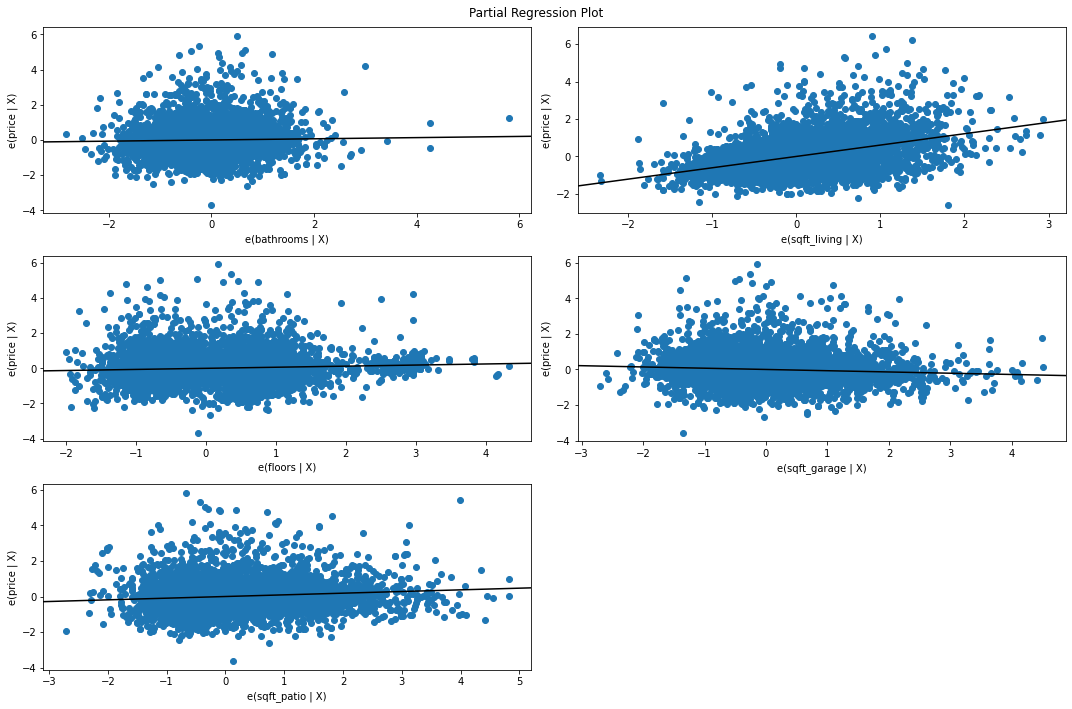

In [35]:
fig = plt.figure(figsize=(15,10))
sm.graphics.plot_partregress_grid(results, 
                                  exog_idx=['bathrooms', 'sqft_living', 'floors', 'sqft_garage', 'sqft_patio'], fig=fig
                                 )
plt.tight_layout()
plt.show()

## Checking for Linearity and Normal Distributions

Now that our data is standardized, we also run a scattermatrix of the variables to get a better visual representation of what we're working with and to ensure that our data is as normal and linear as possible.

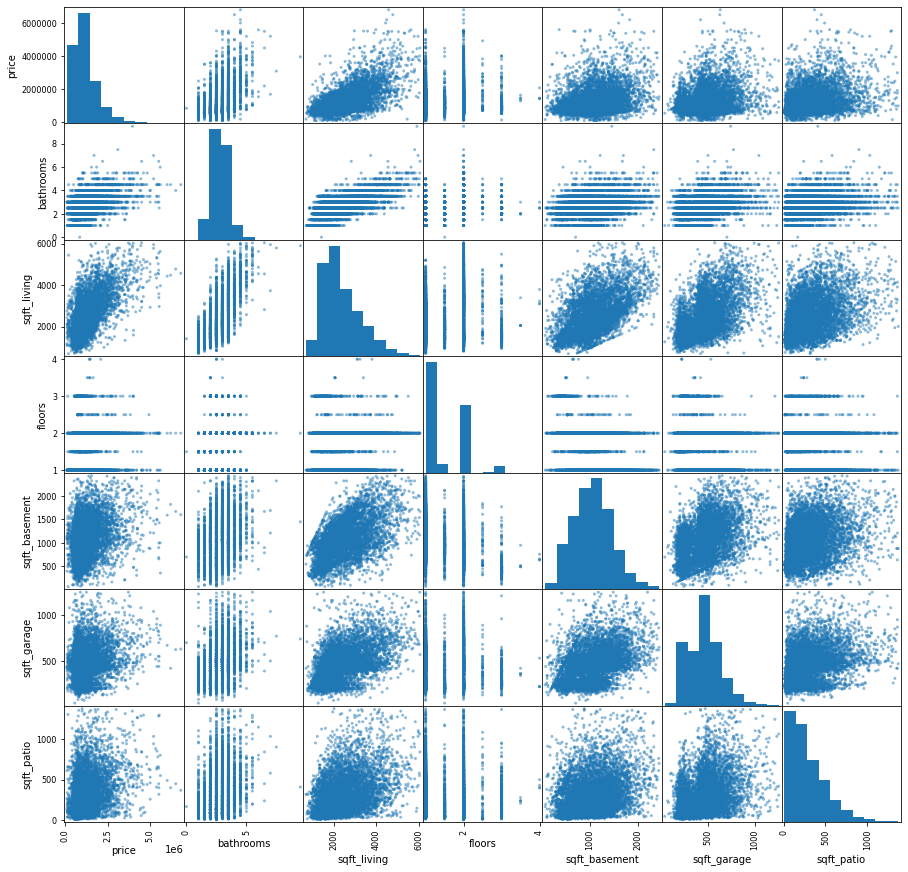

In [36]:
# Looking at a scatter matrix of just continuous numerical data
pd.plotting.scatter_matrix(df_numeric_clean,figsize  = [15, 15]);

### Logging all of the Predictor Variables

In an attempt to improve the linearity and normalcy of our dataset, we log all of our predictor values and run the scattermatrix to compare to our previously standardized data. 

Our data is much less linear than before scaling and we are unable to run our model for any of the predictor variables due to `NaN`s that appeared after taking the log of our predictor variables. This is not a good approach and we will not be prusuing this.

In [37]:
X_log = df_standardized.copy()
X_log = X_log.drop(['price'], axis=1)
X_log_dropped = X_log.copy()

for col in X_log_dropped:
    X_log_dropped[f'log({col})'] = np.log(X_log_dropped[col])
    X_log_dropped.drop([col], axis=1, inplace=True)

# Adding price back into newly logged dataframe
X_log_dropped['price'] = df_numeric_clean['price'].copy()
X_log_dropped

,log(bathrooms),log(sqft_living),log(floors),log(sqft_basement),log(sqft_garage),log(sqft_patio),price
3,-0.98356,NaN,-0.026807,-3.270947,NaN,NaN,775000.0
4,NaN,NaN,-0.026807,NaN,-0.729444,NaN,592500.0
11,-0.98356,NaN,NaN,-2.181874,NaN,NaN,680000.0
16,NaN,-3.247433,NaN,-0.451228,-0.992490,NaN,1318000.0
24,NaN,NaN,NaN,NaN,NaN,NaN,785000.0
...,...,...,...,...,...,...,...
30142,NaN,NaN,NaN,-0.491199,NaN,NaN,880000.0
30144,NaN,NaN,1.012820,NaN,NaN,-1.326598,729950.0
30149,NaN,NaN,-0.026807,NaN,NaN,NaN,719000.0
30152,NaN,NaN,NaN,NaN,NaN,NaN,800000.0


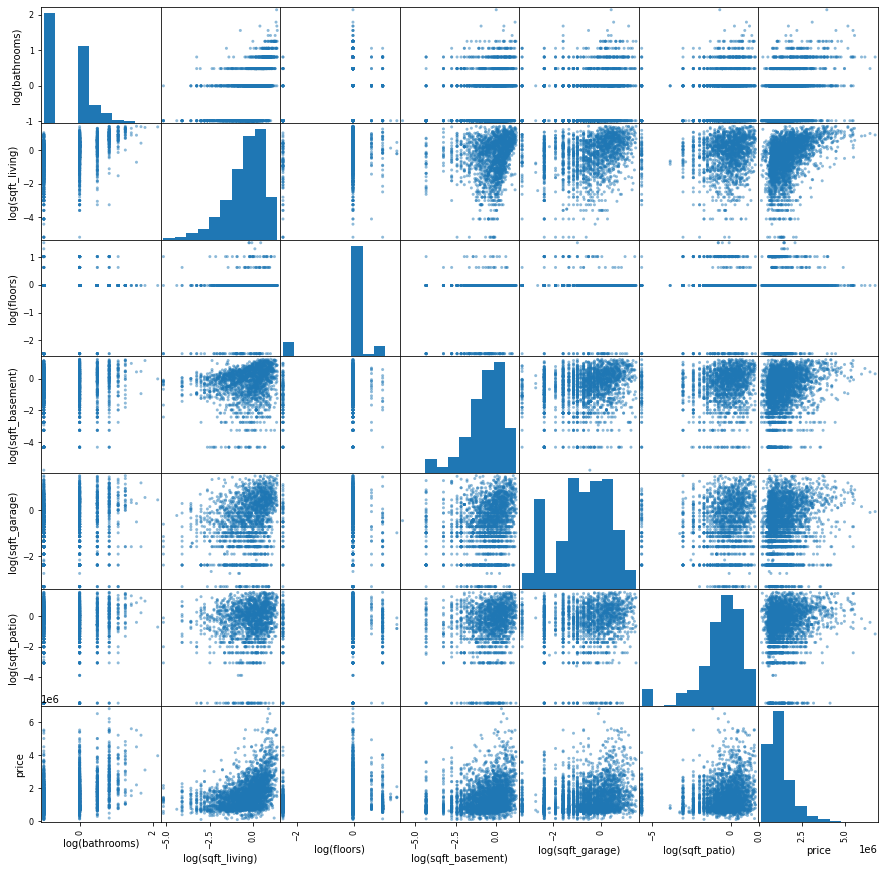

In [38]:
pd.plotting.scatter_matrix(X_log_dropped,figsize  = [15, 15]);

# Logging target and predictor

In [39]:
# X_log = df_numeric_clean.copy()
# # X_log = X_log.drop(['price'], axis=1)
# X_log_dropped = X_log.copy()

# for col in X_log_dropped:
#     X_log_dropped[f'log({col})'] = np.log(X_log_dropped[col])
#     X_log_dropped.drop([col], axis=1, inplace=True)

# # Adding price back into newly logged dataframe
# # X_log_dropped['price'] = df_numeric_clean['price'].copy()
# X_log_dropped

In [40]:
# np.isinf(X_log_dropped).values.sum()

In [41]:
# X_log_dropped = X_log_dropped.replace([np.inf, -np.inf], np.nan).dropna(axis=1)

In [42]:
# X_log_dropped.isna().sum()

In [43]:
# log_test, _ = simple_test.multi_num_model_all_combos(X_log_dropped, 'log(price)')

In [44]:
# log_test.head(3)

In [45]:
# for i in range(3):
#     print(log_test['column'][i])

In [46]:
# y_log = X_log_dropped['log(price)']
# X = X_log_dropped[['log(sqft_living)', 'log(floors)', 'log(sqft_garage)', 'log(sqft_patio)']]
# log_model = sm.OLS(endog = y, exog = sm.add_constant(X)).fit()

# log_model.summary()

Logging the target variable and predictor variables still causes skew and kurtosis and reduces the effectivenes of the model.

### Logging the Target Variable

Since we were not succesful when logging the predictor variables, we will take a look at changes to the relationship when we log-scale the target variable.

After logging our target varible, the simple-linear model had a worse R-squared value (.403) than our baseline model and the multi-linear model was unchanged from our baseline. As such, we will not pursue logging our target variable since it adds no value to our model.

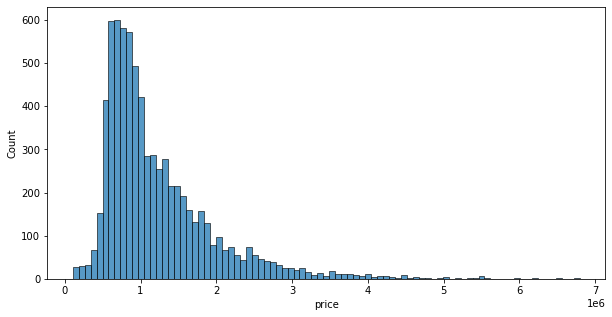

In [47]:
fig, ax = plt.subplots(figsize = (10,5))
sns.histplot(df_numeric_clean['price'], bins = int(np.sqrt(len(df_numeric_clean['price']))));

In [48]:
y_log = np.log(df_numeric_clean['price'])
X = df_numeric_clean[['sqft_living']]

log_model = sm.OLS(y_log, sm.add_constant(X)).fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     4347.
Date:                Fri, 09 Dec 2022   Prob (F-statistic):               0.00
Time:                        01:14:26   Log-Likelihood:                -4072.9
No. Observations:                7277   AIC:                             8150.
Df Residuals:                    7275   BIC:                             8164.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          13.0037      0.014    928.804      0.000      12.976      13.031
sqft_living     0.0004   5.49e-06     65.931      0.000       0.000       0.000
==============================================================================
Omnibus:                      671.687   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1574.542
Skew:                          -0.562   Prob(JB):                         0.00
Kurtosis:                       4.982   Cond. No.                     7.19e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
y_log = np.log(df_numeric_clean['price'])
X = df_numeric_clean[['bathrooms', 'sqft_living', 'floors', 'sqft_garage', 'sqft_patio']]

log_model = sm.OLS(endog = y, exog = sm.add_constant(X)).fit()

log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     1128.
Date:                Fri, 09 Dec 2022   Prob (F-statistic):               0.00
Time:                        01:14:26   Log-Likelihood:                -8235.6
No. Observations:                7277   AIC:                         1.648e+04
Df Residuals:                    7271   BIC:                         1.652e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.8148      0.038    -47.940      0.000      -1.889      -1.741
bathrooms       0.0419      0.016      2.683      0.007       0.011       0.073
sqft_living     0.0007    1.5e-05     44.632      0.000       0.001       0.001
floors          0.1104      0.017      6.448      0.000       0.077       0.144
sqft_garage    -0.0004   5.88e-05     -6.690      0.000      -0.001      -0.000
sqft_patio      0.0004   4.29e-05      9.532      0.000       0.000       0.000
==============================================================================
Omnibus:                     2191.371   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12805.881
Skew:                           1.315   Prob(JB):                         0.00
Kurtosis:                       8.943   Cond. No.                     1.16e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# what if we try polynomial for all predictor variables?

In [50]:
# df_poly = df_numeric.drop(['price'], axis =1).copy()

In [51]:
# for col in df_poly:
#     df_poly[f"{col}^2"] = df_poly[col]**2

In [52]:
# df_numeric

In [53]:
# df_poly

In [54]:
# df_poly['price'] = df_numeric['price'].copy()

Testing Poly with all original columns still in_tact

In [55]:
# poly_results, _ = simple_test.multi_num_model_all_combos(df_poly, 'price')

In [56]:
# for i in range(15):
#     print(poly_results['column'][i])

We get a ton of overlap with squared and not squared, running again with just squared cols

In [57]:
# df_poly2 = df_poly.copy()

# for col in df_numeric:
#     df_poly2.drop([col], axis=1, inplace=True)
    
# df_poly2['price'] = df_numeric['price'].copy()

In [58]:
# poly_results2, _ = simple_test.multi_num_model_all_combos(df_poly2, 'price')

In [59]:
# poly_results2.head(15)

Results are less than the original, unsquared values

# Categorical Data

Now that we have a good baseline for our simple and multi-linear regressions when looking at just numerical data, we can take a look at our categorical data and model the results.

## Setting up the Categorical DataFrame

First, we set up a categorical dataframe to prepare all of our data for easy access through the analysis.

In [60]:
# Creating basic cat df based on dtype
df_cat = df_dropped_no_outliers.select_dtypes(object)

In [61]:
# adding numeric categories into cat df
df_cat['bedrooms'] = df_dropped_no_outliers['bedrooms'].copy()

In [62]:
df_cat.head()

,nuisance,condition,grade,heat_source,bedrooms
3,NO,Average,9 Better,Gas,3
4,YES,Average,7 Average,Electricity,2
11,NO,Very Good,7 Average,Electricity,4
16,NO,Average,8 Good,Gas,3
24,YES,Average,7 Average,Gas,3


What can be changed about each of the remaining?
- nuisance: improve sound damping in house (thicker insulation/windows) or install shrubs/large fence to mute noise
- condition (overall condition related to maintenance): paint house, do some landscaping
- heat_source: upgrade/change your heat source

## Lets start with the condition of the house

### Here's what the kings county website says:

Relative to age and grade. Coded 1-5.

1 = Poor- Worn out. Repair and overhaul needed on painted surfaces, roofing, plumbing, heating and numerous functional inadequacies. Excessive deferred maintenance and abuse, limited value-in-use, approaching abandonment or major reconstruction; reuse or change in occupancy is imminent. Effective age is near the end of the scale regardless of the actual chronological age.

2 = Fair- Badly worn. Much repair needed. Many items need refinishing or overhauling, deferred maintenance obvious, inadequate building utility and systems all shortening the life expectancy and increasing the effective age.

3 = Average- Some evidence of deferred maintenance and normal obsolescence with age in that a few minor repairs are needed, along with some refinishing. All major components still functional and contributing toward an extended life expectancy. Effective age and utility is standard for like properties of its class and usage.

4 = Good- No obvious maintenance required but neither is everything new. Appearance and utility are above the standard and the overall effective age will be lower than the typical property.

5= Very Good- All items well maintained, many having been overhauled and repaired as they have shown signs of wear, increasing the life expectancy and lowering the effective age with little deterioration or obsolescence evident with a high degree of utility.

### Need to have the target var in the dataframe to run the function

In [63]:
df_cat['price'] = df_dropped['price']
df_cat['sqft_living'] = df_dropped['sqft_living']

### Checking correlation between condition and price

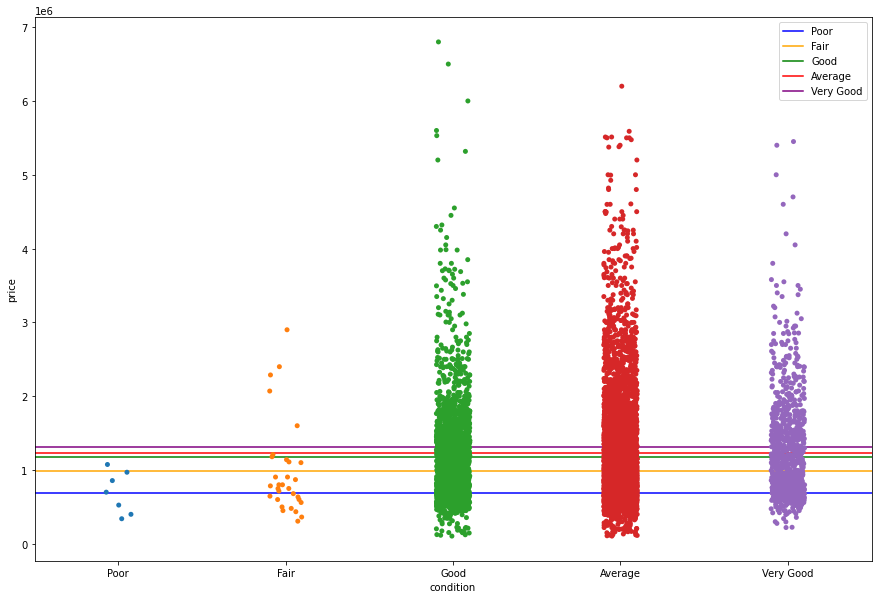

In [64]:
condition_stats, condition_results, condition_summary = simple_test.base_check_for_category(df_cat, 'condition')

In [65]:
condition_stats

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
Average,4370.0,1.227489e+06,774588.116145,104895.0,725000.0,955000.0,1500000.0,6200000.0
Fair,31.0,9.849855e+05,635462.040722,307000.0,600500.0,785000.0,1125000.0,2900000.0
Good,2020.0,1.177475e+06,691608.463904,104920.0,705000.0,1000000.0,1450000.0,6800000.0
Poor,7.0,6.952857e+05,285261.116807,340000.0,462500.0,700000.0,913500.0,1075000.0
Very Good,849.0,1.307268e+06,711968.913637,220795.0,760000.0,1150000.0,1630000.0,5450000.0


In [66]:
condition_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     1066.
Date:                Fri, 09 Dec 2022   Prob (F-statistic):               0.00
Time:                        01:14:26   Log-Likelihood:            -1.0672e+05
No. Observations:                7277   AIC:                         2.135e+05
Df Residuals:                    7271   BIC:                         2.135e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -5.459e+04   1.96e+04     -2.785      0.005    -9.3e+04   -1.62e+04
sqft_living           534.5092      7.350     72.721      0.000     520.101     548.918
condition_Fair       9.013e+04   1.02e+05      0.882      0.378    -1.1e+05     2.9e+05
condition_Good      -2.909e+04   1.52e+04     -1.909      0.056    -5.9e+04     786.629
condition_Poor      -3.054e+05   2.14e+05     -1.425      0.154   -7.25e+05    1.15e+05
condition_Very Good  7.909e+04   2.12e+04      3.723      0.000    3.74e+04    1.21e+05
==============================================================================
Omnibus:                     2169.028   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12245.730
Skew:                           1.311   Prob(JB):                         0.00
Kurtosis:                       8.789   Cond. No.                     8.23e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Lets try looking at nuisance

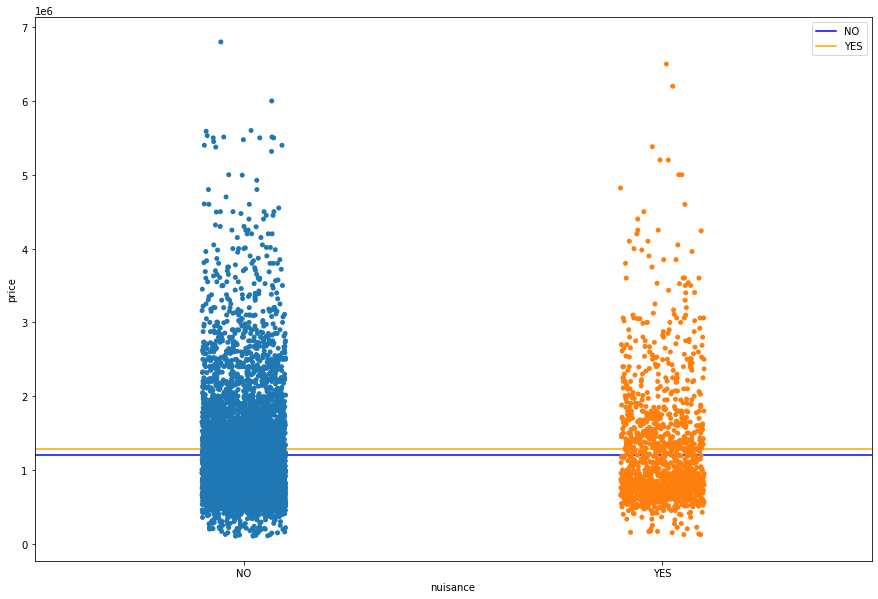

In [67]:
nuisance_stats, nuisance_results, nuisance_summary = simple_test.base_check_for_category(df_cat, 'nuisance')

In [68]:
nuisance_stats

,count,mean,std,min,25%,50%,75%,max
nuisance,,,,,,,,
NO,6026.0,1.208626e+06,730321.760653,104895.0,720000.0,980000.0,1495000.0,6800000.0
YES,1251.0,1.282749e+06,812045.697111,124991.0,740000.0,1010000.0,1575500.0,6500000.0


In [69]:
nuisance_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     2672.
Date:                Fri, 09 Dec 2022   Prob (F-statistic):               0.00
Time:                        01:14:26   Log-Likelihood:            -1.0672e+05
No. Observations:                7277   AIC:                         2.134e+05
Df Residuals:                    7274   BIC:                         2.135e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -7.218e+04    1.9e+04     -3.798      0.000   -1.09e+05   -3.49e+04
sqft_living    535.4773      7.338     72.975      0.000     521.093     549.862
nuisance_YES  9.609e+04   1.76e+04      5.463      0.000    6.16e+04    1.31e+05
==============================================================================
Omnibus:                     2148.199   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11984.246
Skew:                           1.301   Prob(JB):                         0.00
Kurtosis:                       8.723   Cond. No.                     7.68e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

OK, model is not much better and this is telling us that the price goes up based on having a nuisance so that doesnt look right

## Heatsource?

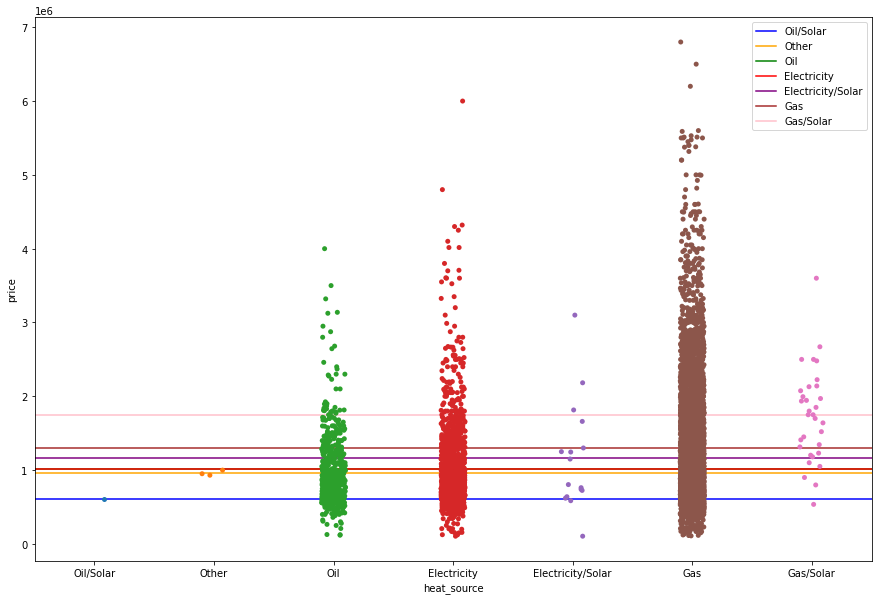

In [70]:
heat_stats, heat_results, heat_summary = simple_test.base_check_for_category(df_cat, 'heat_source')

In [71]:
heat_stats

,count,mean,std,min,25%,50%,75%,max
heat_source,,,,,,,,
Electricity,1433.0,1.015463e+06,571526.239067,104895.0,675000.0,850000.0,1175000.0,6000000.0
Electricity/Solar,16.0,1.167753e+06,738466.987499,104920.0,703625.0,977000.0,1390000.0,3100000.0
Gas,5259.0,1.296167e+06,792349.900242,109200.0,750000.0,1050000.0,1620000.0,6800000.0
Gas/Solar,32.0,1.740428e+06,629438.108693,536000.0,1293300.0,1750000.0,2088750.0,3600000.0
Oil,533.0,1.009987e+06,496225.984672,118309.0,687000.0,902000.0,1215000.0,4000000.0
Oil/Solar,1.0,6.150000e+05,NaN,615000.0,615000.0,615000.0,615000.0,615000.0
Other,3.0,9.606667e+05,35501.173690,931000.0,941000.0,951000.0,975500.0,1000000.0


In [72]:
heat_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     761.8
Date:                Fri, 09 Dec 2022   Prob (F-statistic):               0.00
Time:                        01:14:27   Log-Likelihood:            -1.0672e+05
No. Observations:                7277   AIC:                         2.135e+05
Df Residuals:                    7269   BIC:                         2.135e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                         -1.001e+05   2.18e+04     -4.592      0.000   -1.43e+05   -5.74e+04
sqft_living                     529.8280      7.532     70.348      0.000     515.064     544.592
heat_source_Electricity/Solar  9.133e+04   1.42e+05      0.641      0.521   -1.88e+05     3.7e+05
heat_source_Gas                    7e+04   1.71e+04      4.083      0.000    3.64e+04    1.04e+05
heat_source_Gas/Solar          3.296e+05   1.01e+05      3.251      0.001    1.31e+05    5.28e+05
heat_source_Oil                7.905e+04   2.88e+04      2.748      0.006    2.27e+04    1.35e+05
heat_source_Oil/Solar          1.217e+05   5.67e+05      0.215      0.830   -9.89e+05    1.23e+06
heat_source_Other             -2.602e+05   3.27e+05     -0.795      0.427   -9.02e+05    3.82e+05
==============================================================================
Omnibus:                     2173.983   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12278.042
Skew:                           1.315   Prob(JB):                         0.00
Kurtosis:                       8.795   Cond. No.                     2.18e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.18e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### How about Grade?

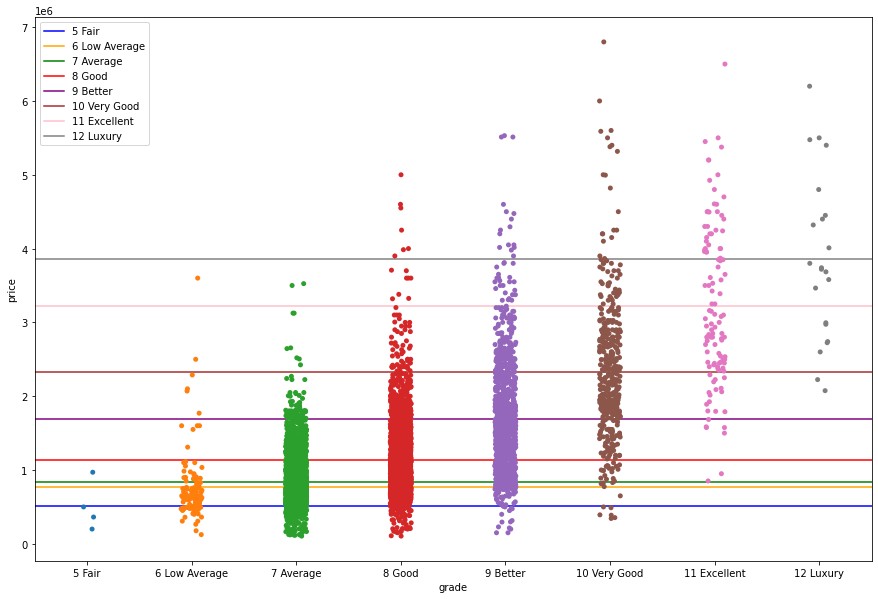

In [73]:
grade_stats, grade_results, grade_summary = simple_test.base_check_for_category(df_cat, 'grade')

In [74]:
grade_stats

,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
10 Very Good,438.0,2.324257e+06,9.187800e+05,343750.0,1787500.0,2200423.0,2777500.0,6800000.0
11 Excellent,111.0,3.219925e+06,1.088835e+06,852000.0,2435000.0,3000000.0,4000000.0,6500000.0
12 Luxury,22.0,3.858159e+06,1.128147e+06,2075000.0,2979625.0,3730000.0,4437500.0,6200000.0
5 Fair,4.0,5.082500e+05,3.313592e+05,200000.0,322250.0,431500.0,617500.0,970000.0
6 Low Average,109.0,7.733944e+05,4.935821e+05,124991.0,510000.0,645000.0,829950.0,3600000.0
7 Average,2719.0,8.430066e+05,3.411280e+05,104895.0,615000.0,760000.0,999999.5,3525000.0
8 Good,2729.0,1.138852e+06,5.108353e+05,104920.0,780000.0,1000000.0,1400000.0,5000000.0
9 Better,1145.0,1.695361e+06,7.506447e+05,150000.0,1115000.0,1620000.0,2110609.0,5530000.0


In [75]:
grade_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     994.7
Date:                Fri, 09 Dec 2022   Prob (F-statistic):               0.00
Time:                        01:14:27   Log-Likelihood:            -1.0603e+05
No. Observations:                7277   AIC:                         2.121e+05
Df Residuals:                    7268   BIC:                         2.121e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.159e+06   4.27e+04     27.121      0.000    1.08e+06    1.24e+06
sqft_living           303.9044      9.114     33.344      0.000     286.038     321.771
grade_11 Excellent   7.152e+05    5.5e+04     12.997      0.000    6.07e+05    8.23e+05
grade_12 Luxury      1.291e+06   1.13e+05     11.442      0.000    1.07e+06    1.51e+06
grade_5 Fair        -9.531e+05    2.6e+05     -3.664      0.000   -1.46e+06   -4.43e+05
grade_6 Low Average -8.538e+05    5.9e+04    -14.475      0.000   -9.69e+05   -7.38e+05
grade_7 Average     -8.921e+05   3.19e+04    -27.987      0.000   -9.55e+05    -8.3e+05
grade_8 Good        -7.183e+05      3e+04    -23.947      0.000   -7.77e+05    -6.6e+05
grade_9 Better      -3.903e+05   2.98e+04    -13.086      0.000   -4.49e+05   -3.32e+05
==============================================================================
Omnibus:                     2173.797   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14192.264
Skew:                           1.268   Prob(JB):                         0.00
Kurtosis:                       9.354   Cond. No.                     1.10e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Bedrooms?

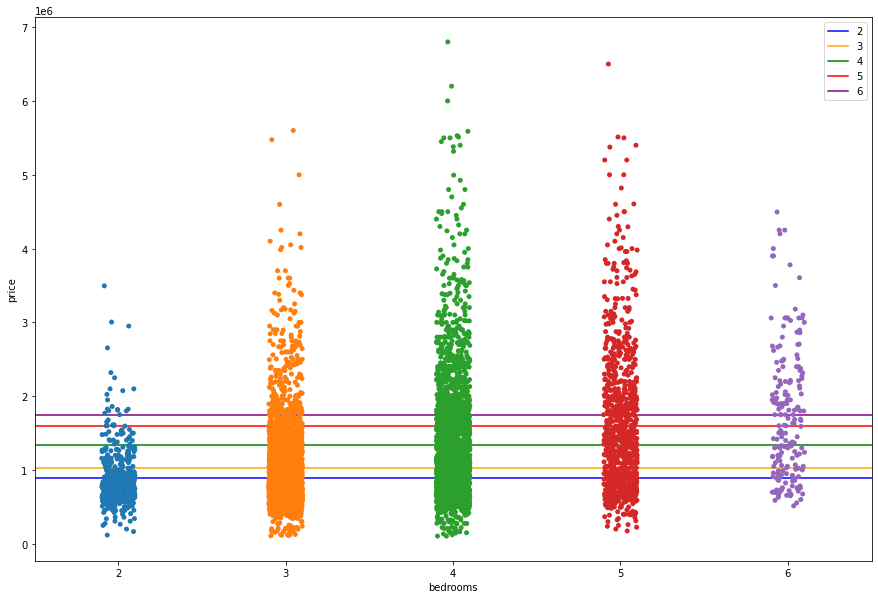

In [76]:
bedroom_stats, bedroom_results, bedroom_summary = simple_test.base_check_for_category(df_cat, 'bedrooms')

In [77]:
bedroom_stats

,count,mean,std,min,25%,50%,75%,max
bedrooms,,,,,,,,
2,506.0,8.877516e+05,382136.565262,118309.0,660000.0,800000.0,989000.0,3495000.0
3,3034.0,1.021242e+06,541082.595040,109200.0,675000.0,880000.0,1210000.0,5600000.0
4,2589.0,1.345754e+06,807213.543455,104895.0,762000.0,1132000.0,1700000.0,6800000.0
5,957.0,1.591886e+06,942189.625801,175000.0,875000.0,1400000.0,2005944.0,6500000.0
6,191.0,1.741662e+06,876121.897231,515000.0,1005500.0,1635000.0,2213000.0,4495000.0


In [78]:
bedroom_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     1095.
Date:                Fri, 09 Dec 2022   Prob (F-statistic):               0.00
Time:                        01:14:27   Log-Likelihood:            -1.0668e+05
No. Observations:                7277   AIC:                         2.134e+05
Df Residuals:                    7271   BIC:                         2.134e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6.016e+04   2.81e+04      2.141      0.032    5079.466    1.15e+05
sqft_living   583.6986      8.995     64.893      0.000     566.066     601.331
bedrooms_3  -1.992e+05   2.75e+04     -7.236      0.000   -2.53e+05   -1.45e+05
bedrooms_4  -2.632e+05   2.95e+04     -8.908      0.000   -3.21e+05   -2.05e+05
bedrooms_5  -3.289e+05   3.48e+04     -9.448      0.000   -3.97e+05   -2.61e+05
bedrooms_6  -4.144e+05   5.17e+04     -8.021      0.000   -5.16e+05   -3.13e+05
==============================================================================
Omnibus:                     2116.221   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11963.225
Skew:                           1.275   Prob(JB):                         0.00
Kurtosis:                       8.740   Cond. No.                     2.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Now running categories along with multilinear regression

In [79]:
df_cat

,nuisance,condition,grade,heat_source,bedrooms,price,sqft_living
3,NO,Average,9 Better,Gas,3,775000.0,2160
4,YES,Average,7 Average,Electricity,2,592500.0,1120
11,NO,Very Good,7 Average,Electricity,4,680000.0,2130
16,NO,Average,8 Good,Gas,3,1318000.0,2420
24,YES,Average,7 Average,Gas,3,785000.0,1820
...,...,...,...,...,...,...,...
30142,NO,Average,8 Good,Gas,4,880000.0,2260
30144,YES,Average,7 Average,Electricity,2,729950.0,1290
30149,NO,Average,8 Good,Gas,3,719000.0,1270
30152,YES,Average,7 Average,Gas,3,800000.0,1620


In [80]:
df_numeric_clean

,price,bathrooms,sqft_living,floors,sqft_basement,sqft_garage,sqft_patio
3,775000.0,3.0,2160,2.0,1070,200,270
4,592500.0,2.0,1120,2.0,550,550,30
11,680000.0,3.0,2130,1.0,1100,440,280
16,1318000.0,2.5,2420,1.0,1310,530,130
24,785000.0,2.5,1820,1.0,860,320,140
...,...,...,...,...,...,...,...
30142,880000.0,2.5,2260,1.0,1300,460,230
30144,729950.0,2.0,1290,3.0,360,250,360
30149,719000.0,2.5,1270,2.0,420,200,60
30152,800000.0,2.0,1620,1.0,920,240,110


In [81]:
df_best_nums = df_numeric_clean[['bathrooms', 'sqft_living', 'floors', 'sqft_garage', 'sqft_patio', 'price']].copy()

In [82]:
df_best_nums['grade'] = df_cat['grade'].copy()

In [83]:
df_best_nums

,bathrooms,sqft_living,floors,sqft_garage,sqft_patio,price,grade
3,3.0,2160,2.0,200,270,775000.0,9 Better
4,2.0,1120,2.0,550,30,592500.0,7 Average
11,3.0,2130,1.0,440,280,680000.0,7 Average
16,2.5,2420,1.0,530,130,1318000.0,8 Good
24,2.5,1820,1.0,320,140,785000.0,7 Average
...,...,...,...,...,...,...,...
30142,2.5,2260,1.0,460,230,880000.0,8 Good
30144,2.0,1290,3.0,250,360,729950.0,7 Average
30149,2.5,1270,2.0,200,60,719000.0,8 Good
30152,2.0,1620,1.0,240,110,800000.0,7 Average


In [84]:
# setting up a model for all chosen numerical variables with the best categorical 
y = df_best_nums['price']
X_cat = pd.get_dummies(df_best_nums.drop(['price'], axis=1), columns=['grade'])
X_cat = X_cat.drop(['grade_5 Fair'], axis=1)

cat_results = sm.OLS(endog = y, exog = sm.add_constant(X_cat)).fit()
cat_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     691.6
Date:                Fri, 09 Dec 2022   Prob (F-statistic):               0.00
Time:                        01:14:27   Log-Likelihood:            -1.0595e+05
No. Observations:                7277   AIC:                         2.119e+05
Df Residuals:                    7264   BIC:                         2.120e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4.534e+05   2.56e+05      1.770      0.077   -4.87e+04    9.56e+05
bathrooms            2.254e+04   1.07e+04      2.104      0.035    1538.889    4.35e+04
sqft_living           312.1213     11.438     27.287      0.000     289.699     334.544
floors              -9.036e+04    1.3e+04     -6.949      0.000   -1.16e+05   -6.49e+04
sqft_garage          -447.1832     40.235    -11.114      0.000    -526.055    -368.311
sqft_patio            166.9118     29.429      5.672      0.000     109.222     224.602
grade_10 Very Good   9.621e+05   2.58e+05      3.733      0.000    4.57e+05    1.47e+06
grade_11 Excellent   1.674e+06   2.62e+05      6.394      0.000    1.16e+06    2.19e+06
grade_12 Luxury       2.26e+06   2.79e+05      8.086      0.000    1.71e+06    2.81e+06
grade_6 Low Average  4597.1732    2.6e+05      0.018      0.986   -5.04e+05    5.14e+05
grade_7 Average      2204.3324   2.55e+05      0.009      0.993   -4.98e+05    5.03e+05
grade_8 Good         1.955e+05   2.56e+05      0.765      0.444   -3.05e+05    6.96e+05
grade_9 Better       5.523e+05   2.56e+05      2.154      0.031    4.97e+04    1.05e+06
==============================================================================
Omnibus:                     2195.332   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14998.657
Skew:                           1.268   Prob(JB):                         0.00
Kurtosis:                       9.560   Cond. No.                     3.17e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.17e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

RMSE and MAE

In [85]:
mean_absolute_error(y, cat_results.predict(sm.add_constant(X_cat)))

354006.06174372

In [86]:
mean_squared_error(y, cat_results.predict(sm.add_constant(X_cat)))

259346460871.26404

# Standardizing numerical data and running again to help with interpretation

In [87]:
# df_standardized = df_numeric.drop(['price'], axis=1).copy()
df_best_standardized = df_best_nums.copy()
df_best_standardized = df_best_standardized.drop(['grade'], axis=1)

for col in df_best_standardized:
    df_best_standardized[col] = (df_best_standardized[col] - df_best_standardized[col].mean()) / df_best_standardized[col].std()
    
# df_standardized['price'] = df_numeric['price']
df_best_standardized.describe()

,bathrooms,sqft_living,floors,sqft_garage,sqft_patio,price
count,7.277000e+03,7.277000e+03,7.277000e+03,7.277000e+03,7.277000e+03,7.277000e+03
mean,1.757561e-17,1.430459e-16,3.319837e-17,1.288878e-16,-1.083829e-16,6.346747e-18
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.368540e+00,-1.862547e+00,-8.062569e-01,-2.361694e+00,-1.262631e+00,-1.497667e+00
25%,-8.735283e-01,-7.460151e-01,-8.062569e-01,-7.445910e-01,-7.823992e-01,-6.658418e-01
50%,-2.497754e-01,-2.374955e-01,-8.062569e-01,-1.968266e-02,-2.585104e-01,-3.170710e-01
75%,3.739774e-01,5.695030e-01,9.735494e-01,4.821770e-01,4.836654e-01,3.737633e-01
max,8.482765e+00,4.040702e+00,4.533162e+00,4.385530e+00,4.674776e+00,7.483320e+00


In [88]:
# setting up a model for all chosen numerical variables with the best categorical 
df_best_standardized['grade'] = df_best_nums['grade'].copy()

y = df_best_standardized['price']
X_cat = pd.get_dummies(df_best_standardized.drop(['price'], axis=1), columns=['grade'])
X_cat = X_cat.drop(['grade_5 Fair'], axis=1)

cat_results = sm.OLS(endog = y, exog = sm.add_constant(X_cat)).fit()
cat_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     691.6
Date:                Fri, 09 Dec 2022   Prob (F-statistic):               0.00
Time:                        01:14:27   Log-Likelihood:                -7552.6
No. Observations:                7277   AIC:                         1.513e+04
Df Residuals:                    7264   BIC:                         1.522e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.3372      0.343     -0.984      0.325      -1.009       0.334
bathrooms               0.0242      0.012      2.104      0.035       0.002       0.047
sqft_living             0.3787      0.014     27.287      0.000       0.352       0.406
floors                 -0.0681      0.010     -6.949      0.000      -0.087      -0.049
sqft_garage            -0.1076      0.010    -11.114      0.000      -0.127      -0.089
sqft_patio              0.0513      0.009      5.672      0.000       0.034       0.069
grade_10 Very Good      1.2906      0.346      3.733      0.000       0.613       1.968
grade_11 Excellent      2.2453      0.351      6.394      0.000       1.557       2.934
grade_12 Luxury         3.0310      0.375      8.086      0.000       2.296       3.766
grade_6 Low Average     0.0062      0.348      0.018      0.986      -0.677       0.689
grade_7 Average         0.0030      0.342      0.009      0.993      -0.668       0.674
grade_8 Good            0.2622      0.343      0.765      0.444      -0.410       0.934
grade_9 Better          0.7409      0.344      2.154      0.031       0.067       1.415
==============================================================================
Omnibus:                     2195.332   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14998.657
Skew:                           1.268   Prob(JB):                         0.00
Kurtosis:                       9.560   Cond. No.                         190.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Results
- the model explains about 52.3% of the variance in the data overall
- the model is statistically significant
- p-values for all numeric feature coeficients are statistically significant
- p-values for 4 of the 11 grades are statistically significant
- The MAE for our final model came in at a variance of about $326,782 dollars



## Interpretation
- When looking at the standardized model, we see that sqft living and basement sq ft have the highest coef
    - This means that they will have the most drastic change to the model at scale and should be prioritized
    
- when we look at our regular model we can get some good interpretation taking everything else into consideration
    - given a substandard quality house with no bedrooms, no living sq ft, and no basement sqft, we would expect the house to be priced about \\$214,100
    - for every increase in bedroom by 1, we would expect the house value to drop by \\$28,320
    - for every increase in 1 square ft of living area, we would expect the house value to increase by about \\$281
    - for every increase in 1 square ft of basement area, we would expect the house value to increase by about \\$107

- We see statistically significant coefficients for building grade which represents the construction quality of improvements. We see that compared to a substandard home:
    - 'very good' quality improvements would increase home value by about \\$1,102,000
    - 'Excellent' quality improvements would increase home value by about \\$1,669,000
    - 'Luxury' quality improvements would increase home value by about \\$2,034,000
    - 'Mansion' quality improvements would increase home value by about\\$2,185,000

# Recommendations
- We recomment increasing the size of your home as the greatest impact to your renovation, first focusing on the total living area sq ft, then looking at basement area sq foot as a secondary (obviously this would be much more expensive then building above ground too)
- We recommend spending the extra dollars for quality craftsmanship as these pay off in the long run with vastly greater home values

# Here's the functions I made, saved outside of the .py file

### But first I save my model and plot

In [89]:
df_cat['millions'] = df_cat['price']/1000000

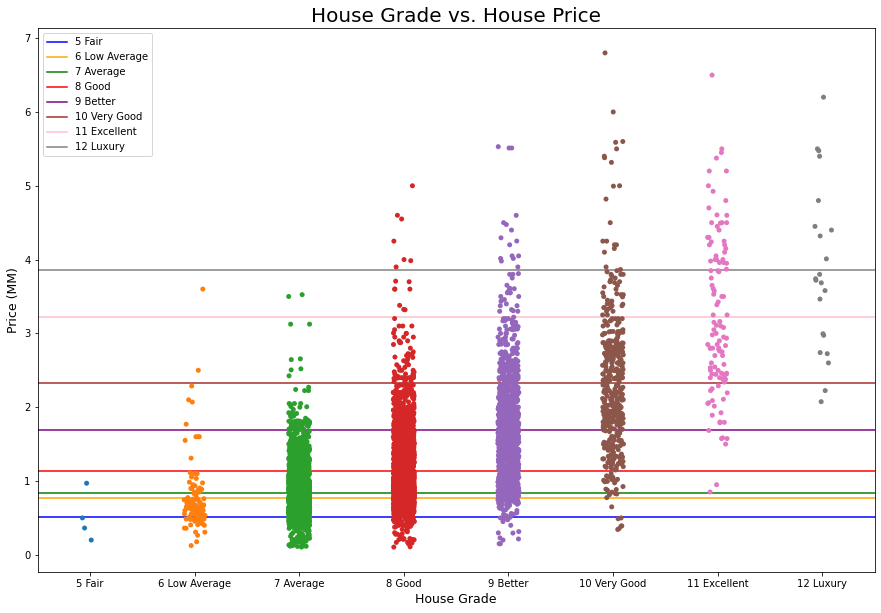

In [90]:
test_df = df_cat['grade'].sort_values().copy()
    
mean_list = []
for i in df_cat.groupby(['grade'])['millions'].mean().sort_values().index:
    mean_list.append(i)

fig, ax = plt.subplots(figsize=(15,10))
sns.stripplot(x=test_df, y=df_cat['millions'], order=mean_list, palette="tab10")

colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
colors = colors *2
    
for i, category in enumerate(mean_list):
    ax.axhline(y=df_cat.groupby(['grade'])['millions'].mean().sort_values().values[i],
                   color = colors[i], label = f"{category}");
ax.set_ylabel('Price (MM)', size=12.5)
ax.set_xlabel('House Grade', size=12.5) 
ax.set_title('House Grade vs. House Price', size=20)
# ax.set_
ax.legend();

# # Model the category
# y = df_cat['price']
# X_cat = df_cat[['grade']].copy()
# # X_cat['sqft_living'] = df_numeric['sqft_living'].copy()
# X_cat = pd.get_dummies(X_cat, columns=[category_column], drop_first=True)
plt.savefig('grade_chart.jpg', format='jpg')

In [91]:
def simple_num_model_all_combos(df, target_var):
    
    '''
    input: dataframe of numerical features and this will run a linear regression 
    model for all columns against the input target var.
    
    return: r^2, adjusted r^2, f-stat prob, const coef, predictor coef, const p-val and predictor p-val.
    return values will be sorted in descending order based on adjusted r^2 values.
    
    Unlike usual models, target_var should be included in the same dataframe as potential x_vars.
    
    df should be a dataframe.
    target_var should be a column name in a string form.
    
    example: simple_num_model_all_combos(df_numeric, 'price')
    '''
    column = []
    r2 = []
    r2_adj = []
    f_stat_p_val = []
    const_coefs = []
    predictor_coef = []
    const_p_val = []
    predictor_p_val =[]
    
    
    for col in df:
        if col != target_var:
            X = df[[col]]
            y = df[target_var]

            model = sm.OLS(y, sm.add_constant(X)).fit()
            column.append(col)
            r2.append(model.rsquared)
            r2_adj.append(model.rsquared_adj)
            f_stat_p_val.append(model.f_pvalue)
            const_coefs.append(model.params.values[0])
            predictor_coef.append(model.params.values[1])
            const_p_val.append(model.pvalues.values[0])
            predictor_p_val.append(model.pvalues.values[1])
        else:
            continue
  
        
    col_list = [column, r2, r2_adj, f_stat_p_val, const_coefs, predictor_coef, const_p_val, predictor_p_val]
    col_list_names = ['column', 'r2', 'r2_adj', 'f_stat_p_val', 'const_coefs', 'predictor_coef', 'const_p_val', 'predictor_p_val']

    output_df = pd.DataFrame(col_list, index = col_list_names)

    output_df_transposed = output_df.T
            
    return output_df_transposed.sort_values('r2_adj', ascending=False)

In [92]:
def multi_num_model_all_combos(df, target_var):
    
    '''
    input: dataframe of numerical features and this will run all variations 
    of a linear regression model for each combination of features against the input target var.
    
    return: r^2, adjusted r^2, f-stat prob
    return values will be sorted in descending order based on adjusted r^2 values.
    
    Unlike usual models, target_var should be included in the same dataframe as potential x_vars.
    
    df should be a dataframe.
    target_var should be a column name in a string form.
    
    example: multi_num_model_all_combos(df_numeric, 'price')
    '''
    
    column = []
    r2 = []
    r2_adj = []
    f_stat_p_val = []
    const_coefs = []
    const_p_val = []

#     predictor_coef = []
#     predictor_p_val =[]
    
    list_of_combos = []
    p_value_good = []
    MAE = []
    RMSE = []
#     target_var = 'price'

    function_df = df.drop([target_var], axis=1).copy()
    for i, x in enumerate(function_df):
        list_of_combos.append(list(combinations(function_df, i+1)))
    
    for i in range(len(list_of_combos)):

        for combo in list_of_combos[i]:
            # created a temp list to hold each column name combination
            temp_list = []
            for x in combo:
                temp_list.append(x)
                X = function_df[temp_list]
                y = df[target_var]

            model = sm.OLS(y, sm.add_constant(X)).fit()
            column.append(temp_list)
            r2.append(model.rsquared)
            r2_adj.append(model.rsquared_adj)
            f_stat_p_val.append(model.f_pvalue)
            const_coefs.append(round(model.params.values[0], 4))
            const_p_val.append(round(model.pvalues.values[0], 4))
            good = 0
            for p in model.pvalues:
                total = len(model.pvalues)
                if p <= .05:
                    good += 1
            p_value_good.append((good/total)*100)
            MAE.append(mean_absolute_error(y, model.predict(sm.add_constant(X))))
            RMSE.append(mean_squared_error(y, model.predict(sm.add_constant(X)), squared=False))


#             if i == range(len(list_of_combos))[-1]:
#             for x in list_of_combos[i]:
#                 p_value_names.append(x)
                   
#             predictor_coef.append(model.params.values[1])
#             predictor_p_val.append(model.pvalues.values[1])
  
        
    col_list = [column, r2, r2_adj, f_stat_p_val, const_coefs, const_p_val, p_value_good, MAE, RMSE]
#                 , predictor_coef, predictor_p_val]
    col_list_names = ['column', 'r2', 'r2_adj', 'f_stat_p_val', 'const_coefs', 'const_p_val', '%p_val < .05', 'MAE', 'RMSE']
#                       , 'predictor_coef', 'predictor_p_val']

    output_df = pd.DataFrame(col_list, index = col_list_names)

    output_df_transposed = output_df.T
    
    output_df_transposed = output_df_transposed.sort_values('r2_adj', ascending=False).reset_index()
    
    
    top_3 = f"The top three combos are: \n\
    - {output_df_transposed['column'][0]} \n\
    \t- adj_r2: {output_df_transposed['r2_adj'][0]} \n\
    \t- ratio of p-vals <.05: {output_df_transposed['%p_val < .05'][0]}\n\
    - {output_df_transposed['column'][1]} \n\
    \t- adj_r2: {output_df_transposed['r2_adj'][1]}, \n\
    \t- ratio of p-vals <.05: {output_df_transposed['%p_val < .05'][1]}\n\
    - {output_df_transposed['column'][2]} \n\
    \t- adj_r2: {output_df_transposed['r2_adj'][2]}, \n\
    \t- ratio of p-vals <.05: {output_df_transposed['%p_val < .05'][2]}"
    
    # trying to get p_values for all coefs into the df but this is hard and i'm gonna comment this out and stop
#     for x in p_value_names:
#         for name in x:
#             output_df_transposed[f"p_val {name}"] = np.nan
            
    return output_df_transposed, print(top_3)

In [93]:
def base_check_for_category(df, category_column):
    
    '''
    Input a dataframe and specify a target column from the dataframe. 
    The dataframe needs to have categorical information only.
    
    Output is a stripplot of the category, statistics on the avg home price 
    when grouped by the category column, and a one-hot encoded model with the 
    first col dropped.
    '''
    
# Check how the categories in the feature compare to the price distribution
    stats = df.groupby([category_column])['price'].describe()
    
# Creating a chart of the column categories    
#     temp_list = list(df[category_column].unique())
#     sorted_list = sorted(temp_list)
    test_df = df[category_column].sort_values()
    
    mean_list = []
    for i in df.groupby([category_column])['price'].mean().sort_values().index:
        mean_list.append(i)

    fig, ax = plt.subplots(figsize=(15,10))
    sns.stripplot(x=test_df, y=df['price'], order=mean_list, palette="tab10")

    colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
    colors = colors *2
    
    for i, category in enumerate(mean_list):
#         z = i+1
        ax.axhline(y=df.groupby([category_column])['price'].mean().sort_values().values[i],
                   color = colors[i], label = f"{category}");
    ax.legend()

# Model the category
    y = df['price']
    X_cat = df[[category_column]].copy()
    X_cat['sqft_living'] = df_numeric['sqft_living'].copy()
    X_cat = pd.get_dummies(X_cat, columns=[category_column], drop_first=True)

    cat_results = sm.OLS(endog = y, exog = sm.add_constant(X_cat)).fit()
    
# get a summary of the model
    cat_summary = cat_results.summary()
    return stats, cat_results, cat_summary

In [94]:
def check_for_category_multi(category_column):
    
# Check how the categories in the feature compare to the price distribution
    stats = df_all_cat_reduced.groupby([category_column])['price'].describe()
    
# Creating a chart of the column categories    
    temp_list = list(df_all_cat_reduced[category_column].unique())

    fig, ax = plt.subplots(figsize=(15,10))
    sns.stripplot(x=df_all_cat_reduced[category_column], y=df_all_cat_reduced['price'])

    colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
    colors = colors *2
    
    for i, category in enumerate(temp_list):
        z = i+1
        ax.axhline(y=df_all_cat_reduced.groupby([category_column])['price'].mean().values[i],
                   color = colors[i], label = f"{category}");
    ax.legend()

# Model the category
    y = df_numeric['price']
    X_cat = X_standardized.copy()
    X_cat[category_column] = df_all_cat_reduced[[category_column]].copy()
    X_cat = pd.get_dummies(X_cat, columns=[category_column], drop_first=True)

    cat_results = sm.OLS(endog = y, exog = sm.add_constant(X_cat)).fit()
    
# get a summary of the model
    cat_summary = cat_results.summary()
    return stats, cat_results, cat_summary